In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import pydot

# preparing data
from sklearn.datasets import load_iris
from sklearn import datasets
# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

#models for Classification
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

#Evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Reading Hungarian data
df1 = pd.read_csv('data_hungarian.csv')

In [3]:
# reading long-beach data
df2 = pd.read_csv('data_long-beach.csv')

In [4]:
# reading switzerland data
df3 = pd.read_csv('data_switzerland.csv')

In [5]:
frames = [df1, df2, df3]

In [6]:
# concatenate multiple data CSV files
df = pd.concat(frames)

In [7]:
print(df.shape)

(617, 77)


In [8]:
df.head()

,Unnamed: 0,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,0,1254,0,40,1,1,0,0,-9,2,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
1,1,1255,0,49,0,1,0,0,-9,3,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
2,2,1256,0,37,1,1,0,0,-9,2,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
3,3,1257,0,48,0,1,1,1,-9,4,...,2,-9,1,1,1,1,1,-9.0,-9.0,name
4,4,1258,0,54,1,1,0,1,-9,3,...,1,-9,1,1,1,1,1,-9.0,-9.0,name


In [9]:
#Drpopping unnecessary columns
df_updated = df.drop(['name','junk','id','Unnamed: 0'],axis=1)

In [10]:
#first few instances of dataset
df_updated.head()

,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,...,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef
0,0,40,1,1,0,0,-9,2,140,0,...,-9,-9,-9,-9,1,1,1,1,1,-9.0
1,0,49,0,1,0,0,-9,3,160,1,...,-9,-9,-9,-9,1,1,1,1,1,-9.0
2,0,37,1,1,0,0,-9,2,130,0,...,-9,-9,-9,-9,1,1,1,1,1,-9.0
3,0,48,0,1,1,1,-9,4,138,0,...,-9,-9,2,-9,1,1,1,1,1,-9.0
4,0,54,1,1,0,1,-9,3,150,0,...,-9,-9,1,-9,1,1,1,1,1,-9.0


In [11]:
#Types of data in the dataframe
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 122
Data columns (total 73 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ccf       617 non-null    int64  
 1   age       617 non-null    int64  
 2   sex       617 non-null    int64  
 3   painloc   617 non-null    int64  
 4   painexer  617 non-null    int64  
 5   relrest   617 non-null    int64  
 6   pncaden   617 non-null    int64  
 7   cp        617 non-null    int64  
 8   trestbps  617 non-null    int64  
 9   htn       617 non-null    int64  
 10  chol      617 non-null    int64  
 11  smoke     617 non-null    int64  
 12  cigs      617 non-null    int64  
 13  years     617 non-null    int64  
 14  fbs       617 non-null    int64  
 15  dm        617 non-null    int64  
 16  famhist   617 non-null    int64  
 17  restecg   617 non-null    int64  
 18  ekgmo     617 non-null    int64  
 19  ekgday    617 non-null    int64  
 20  ekgyr     617 non-null    int64 

In [12]:
# Renaming num as target
df_updated.rename(columns={'num':'target'}, inplace=True)

In [13]:
#Types of data in the dataframe
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 122
Data columns (total 73 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ccf       617 non-null    int64  
 1   age       617 non-null    int64  
 2   sex       617 non-null    int64  
 3   painloc   617 non-null    int64  
 4   painexer  617 non-null    int64  
 5   relrest   617 non-null    int64  
 6   pncaden   617 non-null    int64  
 7   cp        617 non-null    int64  
 8   trestbps  617 non-null    int64  
 9   htn       617 non-null    int64  
 10  chol      617 non-null    int64  
 11  smoke     617 non-null    int64  
 12  cigs      617 non-null    int64  
 13  years     617 non-null    int64  
 14  fbs       617 non-null    int64  
 15  dm        617 non-null    int64  
 16  famhist   617 non-null    int64  
 17  restecg   617 non-null    int64  
 18  ekgmo     617 non-null    int64  
 19  ekgday    617 non-null    int64  
 20  ekgyr     617 non-null    int64 

In [14]:
# Selecting few important features as described in the UCI data
data = df_updated[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang',
            'oldpeak', 'slope', 'ca', 'thal', 'target']] 


In [15]:
#first few instances of dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0


In [16]:
data.shape

(617, 14)

In [17]:
# Evaluating the count of each target values
data['target'].value_counts()

0    247
1    141
3    100
2     99
4     30
Name: target, dtype: int64

In [18]:
# mapping 2,3,4 values to 1 in the target 
data['target'] = data.target.map({0:0, 1:1, 2:1, 3:1, 4:1})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,1
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,54,1,4,180,0,-9,0,150,0,1.5,2,-9,7,1
119,56,1,4,125,0,1,0,103,1,1.0,2,-9,7,1
120,56,1,3,125,0,-9,0,98,0,-2.0,2,-9,7,1
121,54,1,4,130,0,-9,0,110,1,3.0,2,-9,7,1


In [20]:
#checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
# correlation between the 'target' and all the other features
data[data.columns[1:]].corr()['target'][:]

sex         0.301422
cp          0.495852
trestbps   -0.004495
chol       -0.219530
fbs        -0.184811
restecg     0.028044
thalach    -0.194882
exang       0.054741
oldpeak     0.079333
slope       0.466040
ca         -0.022046
thal        0.244314
target      1.000000
Name: target, dtype: float64

In [22]:
# Evaluating the count of each chol values
data['chol'].value_counts()

 0      172
-9       30
 216      7
 220      7
 219      6
       ... 
 326      1
 212      1
 318      1
 316      1
 603      1
Name: chol, Length: 183, dtype: int64

In [23]:
# printing the mean of cholestrol
print(data['chol'].mean())  

165.65316045380874


In [24]:
# replacing 0 values of chol with its mean
data['chol'] = data['chol'].replace(0, 166.0907617504052)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# Evaluating the count of each chol values
data['chol'].value_counts()

 166.090762    172
-9.000000       30
 220.000000      7
 216.000000      7
 260.000000      6
              ... 
 181.000000      1
 232.000000      1
 333.000000      1
 300.000000      1
 244.000000      1
Name: chol, Length: 183, dtype: int64

In [26]:
# Evaluating the count of each target values
data.target.value_counts()

1    370
0    247
Name: target, dtype: int64

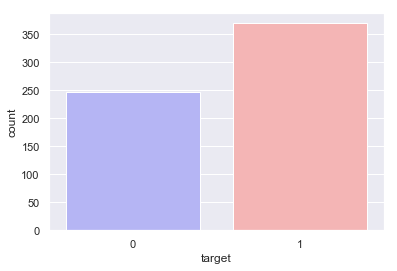

In [27]:
#plot between the count of the target values
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

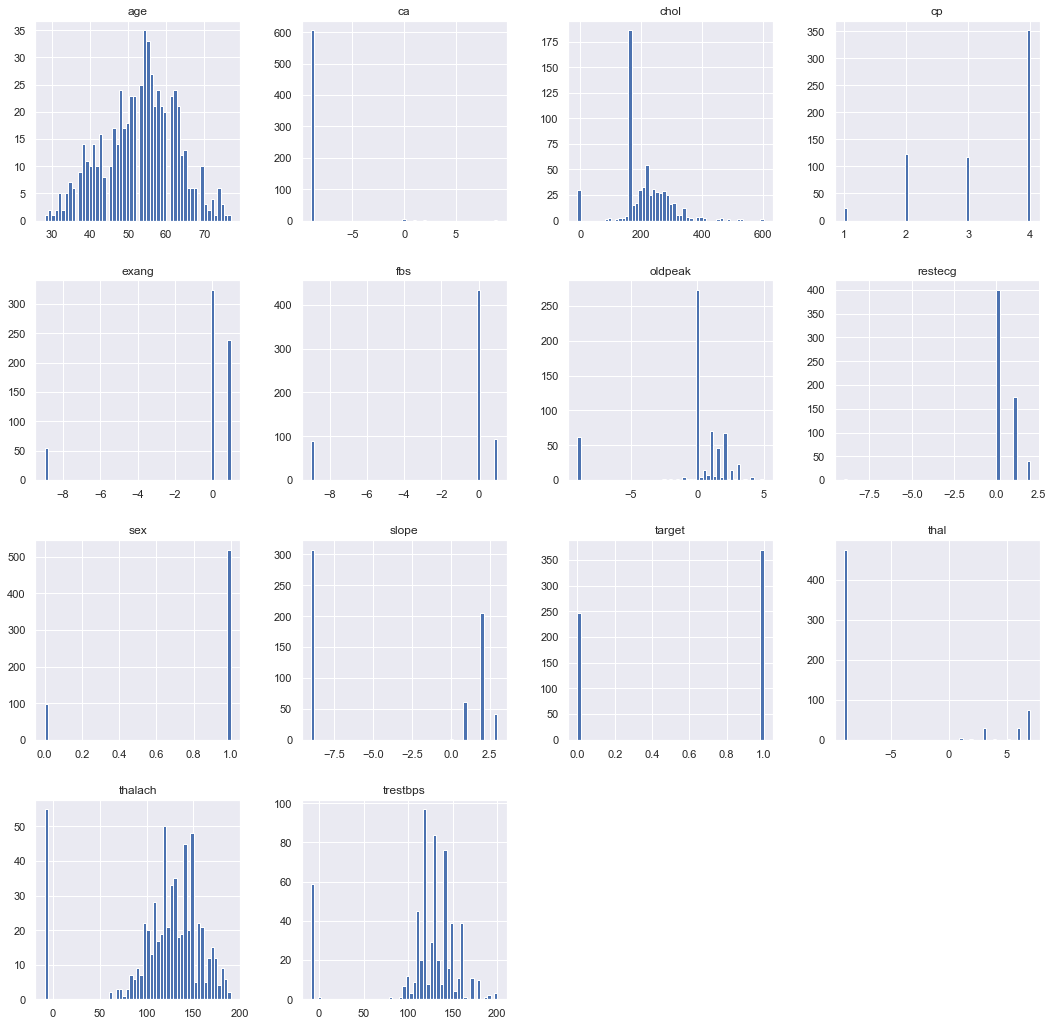

In [28]:
# Histogram plot of data
data.hist(bins=55, figsize= (18,18))
plt.show

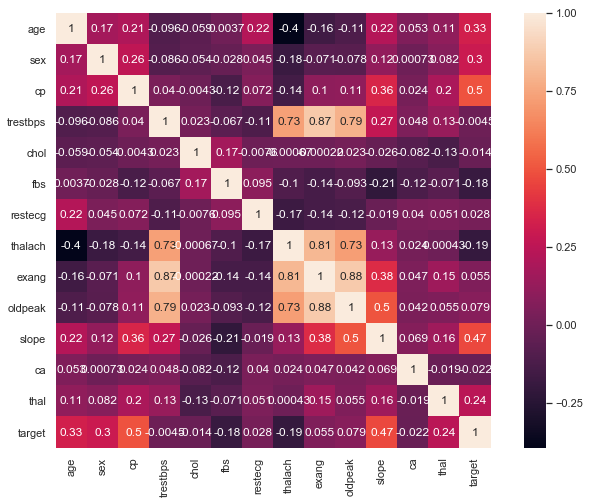

In [29]:
#Plotting the correlation for the data
cmat = data.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cmat, vmax=1, square=True,annot=True);
plt.show()

In [30]:
#correlation with target
data[data.columns[1:]].corr()['target'][:]

sex         0.301422
cp          0.495852
trestbps   -0.004495
chol       -0.014174
fbs        -0.184811
restecg     0.028044
thalach    -0.194882
exang       0.054741
oldpeak     0.079333
slope       0.466040
ca         -0.022046
thal        0.244314
target      1.000000
Name: target, dtype: float64

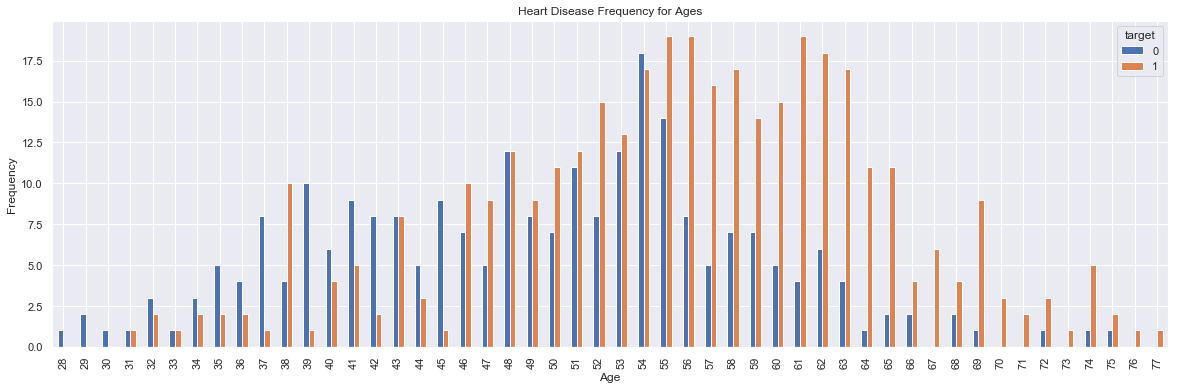

In [31]:
#Plot between age and target
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

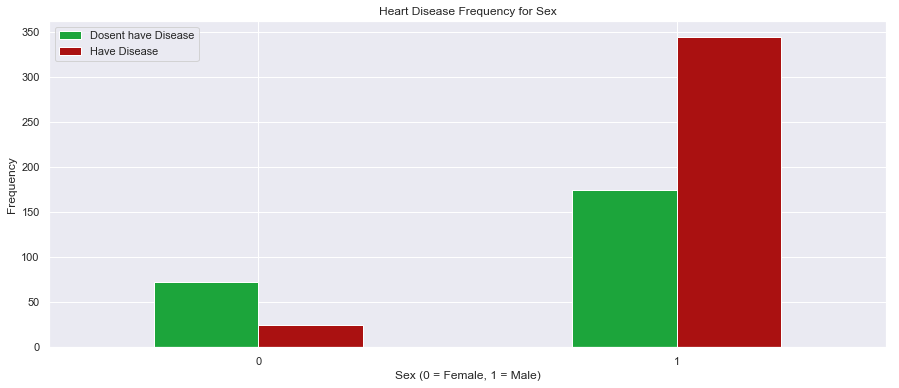

In [32]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Dosent have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [33]:
# splitting the data set with 80% train_validation and 20% test
Xt = data.iloc[:,0:13]
yt = data.iloc[:,13]
Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size=0.2,random_state=0)

In [34]:
#Feature scaling
scaling = StandardScaler()
X_train = scaling.fit_transform(Xt_train)
X_test = scaling.transform(Xt_test)

In [35]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)
scores = cross_val_score(rf, Xt, yt, cv=10)
print("Accuracy for 10 reputaions: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy for 10 reputaions: 0.80 (+/- 0.18)


The accuracy of Random Forest Classifier is 0.8467741935483871
[[44 10]
 [ 9 61]]
The accuracy  0.8467741935483871
Precision: 0.8591549295774648
Recall: 0.8714285714285714
Fscore: 0.8652482269503546


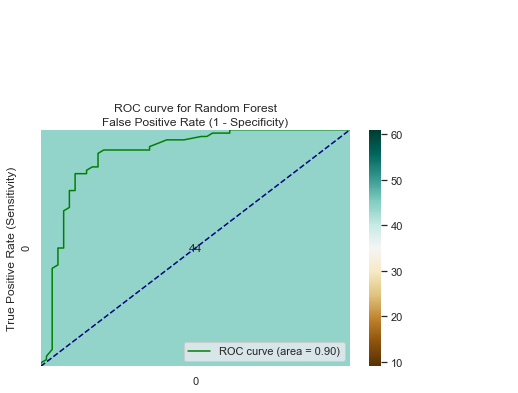

In [36]:
#Random Forest 

rf = RandomForestClassifier(n_estimators=100,random_state=0)

rf.fit(Xt_train,yt_train)
rf_pred = rf.predict(Xt_test)


cm = confusion_matrix(yt_test,rf_pred)
print('The accuracy of Random Forest Classifier is',metrics.accuracy_score(rf_pred,yt_test))
print(cm)

cnf_matrix = metrics.confusion_matrix(yt_test, rf_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BrBG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('The accuracy ',metrics.accuracy_score(rf_pred,yt_test))
print("Precision:",metrics.precision_score(yt_test, rf_pred))
print("Recall:",metrics.recall_score(yt_test, rf_pred))
print("Fscore:",metrics.f1_score(yt_test,rf_pred))
yt_pred_proba = rf.predict_proba(Xt_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_test,  yt_pred_proba)

auc = metrics.roc_auc_score(yt_test, yt_pred_proba)
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for Random Forest')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

The accuracy  0.7016129032258065
Precision: 0.7142857142857143
Recall: 0.7857142857142857
Fscore: 0.7482993197278911


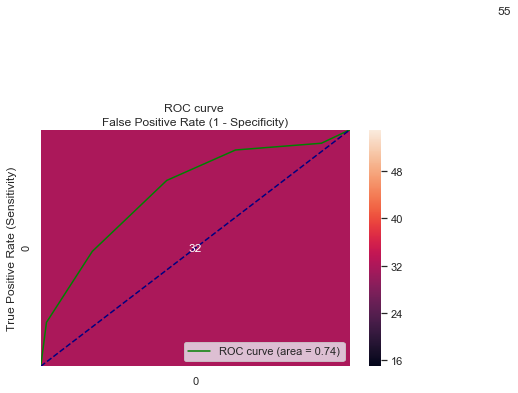

The accuracy  0.7419354838709677
Precision: 0.7567567567567568
Recall: 0.8
Fscore: 0.7777777777777778


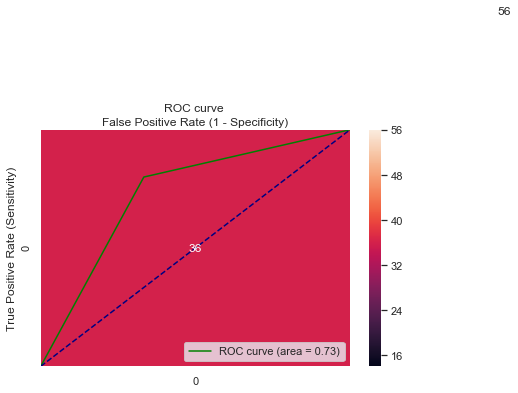

The accuracy  0.8064516129032258
Precision: 0.7948717948717948
Recall: 0.8857142857142857
Fscore: 0.8378378378378378


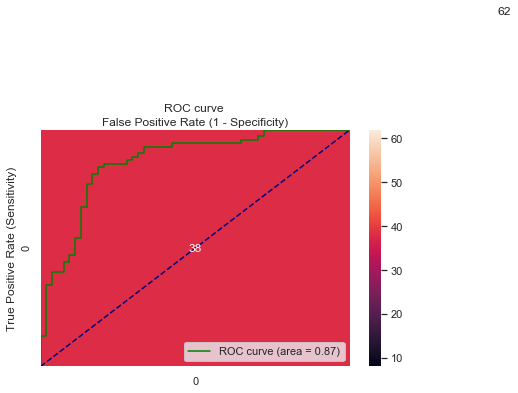

,Accuracy
KNN,0.701613
Decision Tree,0.741935
Naive Bayes,0.806452


In [37]:
#All classifier model accuracies
abc=[]
classifiers=['KNN','Decision Tree','Naive Bayes']
models=[KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),GaussianNB()]
for i in models:
    model = i
    model.fit(Xt_train,yt_train)
    yt_pred=model.predict(Xt_test)
    abc.append(metrics.accuracy_score(yt_pred,yt_test))
    cnf_matrix = metrics.confusion_matrix(yt_test, yt_pred)
    cnf_matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print('The accuracy ',metrics.accuracy_score(yt_pred,yt_test))
    print("Precision:",metrics.precision_score(yt_test, yt_pred))
    print("Recall:",metrics.recall_score(yt_test, yt_pred))
    print("Fscore:",metrics.f1_score(yt_test,yt_pred))
    yt_pred_proba = model.predict_proba(Xt_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(yt_test,  yt_pred_proba)

    auc = metrics.roc_auc_score(yt_test, yt_pred_proba)
    plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12         
    plt.title('ROC curve ')        
    plt.xlabel('False Positive Rate (1 - Specificity)')        
    plt.ylabel('True Positive Rate (Sensitivity)')        
    plt.legend(loc="lower right")        
    plt.show() 
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe